In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.8.0'

In [3]:
keras.__version__

'2.8.0'

# Image classifier using sequential API

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [6]:
X_valid, X_train = X_train[:5000]/255.0, X_train[5000:]/255.0
Y_valid, Y_train = Y_train[:5000] , Y_train[5000:]

In [7]:
classes = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [8]:
classes[Y_train[0]]

'coat'

### Creating the model

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-04-21 16:05:56.309892: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-21 16:05:57.036698: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22824 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:02:00.0, compute capability: 7.5


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.layers

In [26]:
hidden1 = model.layers[1]

In [27]:
hidden1.name

'dense'

In [30]:
weights, bias = hidden1.get_weights()
print(weights.shape)
print(bias.shape)

(784, 300)
(300,)


### Compiling the model

In [31]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

### Training the model

In [32]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7395 - accuracy: 0.7547 - val_loss: 0.5302 - val_accuracy: 0.8162
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4935 - accuracy: 0.8277 - val_loss: 0.4397 - val_accuracy: 0.8542
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4459 - accuracy: 0.8438 - val_loss: 0.4240 - val_accuracy: 0.8516
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4197 - accuracy: 0.8516 - val_loss: 0.4325 - val_accuracy: 0.8456
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3999 - accuracy: 0.8590 - val_loss: 0.3946 - val_accuracy: 0.8666
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3834 - accuracy: 0.8651 - val_loss: 0.3909 - val_accuracy: 0.8648
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3692 - accuracy: 0.8697 - val_loss: 0.3564 - val_accuracy:

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

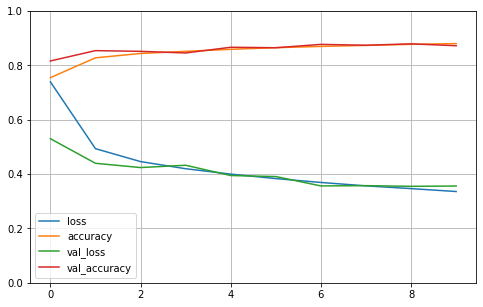

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 60.1506 - accuracy: 0.8413


[60.15061950683594, 0.8413000106811523]

### making Predictions

In [41]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
import numpy as np
y_classes = [np.argmax(x) for x in y_prob]
y_classes

[9, 2, 1]

In [44]:
np.array(classes)[y_classes]

array(['ankle boot', 'pullover', 'trouser'], dtype='<U10')

## Batch Normalization Layer

### Adding BN layer after every hidden layer

In [10]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                                keras.layers.BatchNormalization(),
                                 keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
                                keras.layers.BatchNormalization(),
                                 keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"),
                                keras.layers.BatchNormalization(),
                                 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
                                keras.layers.BatchNormalization(),
                                 keras.layers.Dense(10, activation="softmax")])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 200)               60200     
                                                                 
 batch_normalization_2 (Batc  (None, 200)             

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

In [13]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 7ms/step - loss: 0.5418 - accuracy: 0.8112 - val_loss: 0.3910 - val_accuracy: 0.8662
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4077 - accuracy: 0.8549 - val_loss: 0.3606 - val_accuracy: 0.8730
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3715 - accuracy: 0.8664 - val_loss: 0.3457 - val_accuracy: 0.8796
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3474 - accuracy: 0.8758 - val_loss: 0.3390 - val_accuracy: 0.8808
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3241 - accuracy: 0.8833 - val_loss: 0.3370 - val_accuracy: 0.8780
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3088 - accuracy: 0.8878 - val_loss: 0.3241 - val_accuracy: 0.8830
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2973 - accuracy: 0.8917 - val_loss: 0.3288 - val_ac

### Adding BN layer before the activation function

In [14]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                                keras.layers.BatchNormalization(),
                                 keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
                                keras.layers.BatchNormalization(),
                                 keras.layers.Activation("elu"),
                                 keras.layers.Dense(200, kernel_initializer="he_normal", use_bias=False),
                                keras.layers.BatchNormalization(),
                                 keras.layers.Activation("elu"),
                                 keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
                                keras.layers.BatchNormalization(),
                                 keras.layers.Activation("elu"),
                                 keras.layers.Dense(10, activation="softmax")])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 300)               235200    
                                                                 
 batch_normalization_5 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_8 (Dense)             (None, 200)              

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5525 - accuracy: 0.8098 - val_loss: 0.4075 - val_accuracy: 0.8608
Epoch 2/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4241 - accuracy: 0.8523 - val_loss: 0.3725 - val_accuracy: 0.8712
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3862 - accuracy: 0.8629 - val_loss: 0.3510 - val_accuracy: 0.8754
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3645 - accuracy: 0.8707 - val_loss: 0.3468 - val_accuracy: 0.8792
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3417 - accuracy: 0.8772 - val_loss: 0.3295 - val_accuracy: 0.8816
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3277 - accuracy: 0.8823 - val_loss: 0.3290 - val_accuracy: 0.8812
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3138 - accuracy: 0.8875 - val_loss: 0.3212 - val_ac